In order to build our image search engine on digits data set we're going to use the hog descriptor

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from PIL import Image
import numpy as np

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 3.8.1 32-bit.

In [3]:
digits = datasets.load_digits()
len(digits.images)

1797

## Showing 50 images using matplotlib

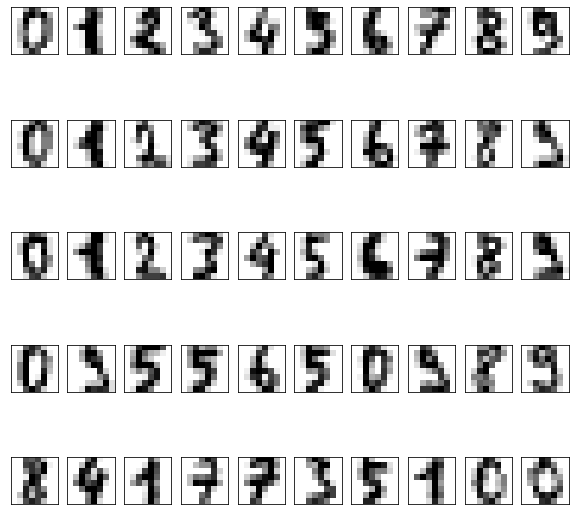

In [4]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

In [30]:
def Projection(image):
    array = np.array(image)
    horz_proj = np.array([np.count_nonzero(row) for row in array])
    img_trans = array.transpose()
    ver_proj = np.array([np.count_nonzero(row) for row in img_trans])

    return horz_proj,ver_proj

In [31]:
def correlation(x,y):
    fracA = sum((x-np.average(x))*(y-np.average(y)))
    fracB = np.sqrt(sum(np.power(x-np.average(x),2)))*np.sqrt(sum(np.power(y-np.average(y),2)))
    return fracA/fracB

def minkowski_distance(x,y,p):
    return np.sum(np.abs(x-y)**p)**(1/p)

def euclidianne_distance(x,y):
    return minkowski_distance(x,y,2)

def manhathan_distance(x,y):
    return minkowski_distance(x,y,1)

def lim_plus_distance(x,y):
    return np.max(np.abs(x-y))

def lim_min_distance(x,y):
    return np.min(np.abs(x-y))

def cosine(x,y):
    return np.sum(x*y)/(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2)))

In [36]:
#empty object to hold image and it's descriptor
image_and_desc = { 'image':[],'desc':[]}

#empty list to hold all images and descriptors
images_descriptors = []

for image in digits.images:
    #looping through images
    image_and_desc['image'] = image

    #calculting projection vector
    horz_proj,ver_proj= Projection(image)
    image_and_desc['desc'] = ver_proj

    
    images_descriptors.append(image_and_desc)
    image_and_desc = { 'image':[],'desc':[]}


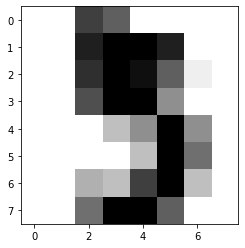

In [54]:
#Getting one Query Image
query_image = digits.images[5]
plt.imshow(query_image,cmap ='binary')
_,ver_proj = Projection(query_image)

for image_and_desc in images_descriptors:
    image_and_desc['distance'] = correlation(ver_proj,image_and_desc['desc'])

images_descriptors.sort(key = lambda x:x['distance'])

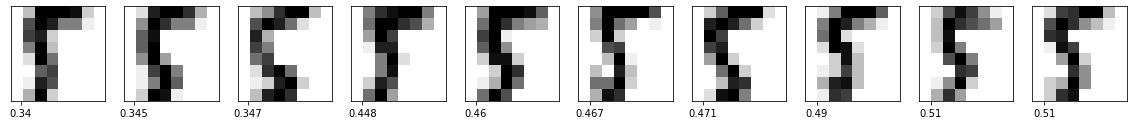

In [55]:
plt.figure(figsize=(20,20))
for i in range(10):

    image_and_desc = images_descriptors[i]

    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()